In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")  # Permet d'importer depuis src/
from src.utils.config import TRAIN_ZIP_FILE

# Config
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)



# Chargement direct du CSV depuis le .zip
df = pd.read_csv(TRAIN_ZIP_FILE, compression='zip')



# Aperçu de la base
print(f"Shape: {df.shape}")
df.head()

Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

#### Analyse de la variable cible

/var/folders/h6/mk7_836952567b6qyd5pjr440000gn/T/ipykernel_12233/2728373639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='TARGET', palette=colors)
/var/folders/h6/mk7_836952567b6qyd5pjr440000gn/T/ipykernel_12233/2728373639.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


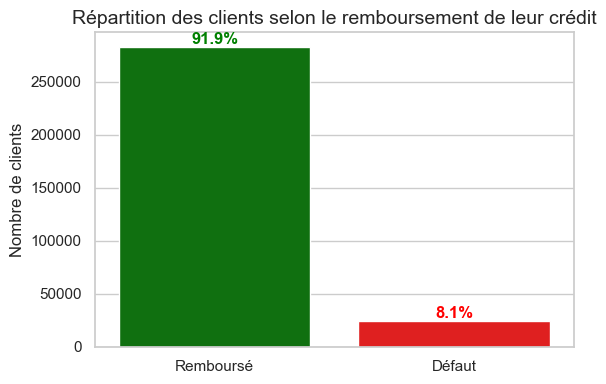

In [ ]:
# Variable cible (0 = remboursé, 1 = défaut)
labels = ['Remboursé', 'Défaut']
counts = df['TARGET'].value_counts(normalize=True) * 100
colors = ['green', 'red']

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='TARGET', palette=colors)

# Ajout des % au-dessus de chaque barre
for p, label, pct, color in zip(ax.patches, labels, counts, colors):
    height = p.get_height()
    ax.annotate(f'{pct:.1f}%',                 # texte : % arrondi
                (p.get_x() + p.get_width() / 2, height),  # position au-dessus de la barre
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color=color)

# Customiser l’axe X
ax.set_xticklabels(labels)
ax.set_title('Répartition des clients selon le remboursement de leur crédit', fontsize=14)
ax.set_ylabel('Nombre de clients')
ax.set_xlabel('')

plt.tight_layout()
plt.show()

#### Detection des valeurs manquantes 

In [16]:
# Pourcentage de valeurs manquantes
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Variable': missing.index,
    'Valeurs manquantes (%)': missing_pct
})
missing_df.head(15)

,Variable,Valeurs manquantes (%)
COMMONAREA_MEDI,COMMONAREA_MEDI,69.872297
COMMONAREA_MODE,COMMONAREA_MODE,69.872297
COMMONAREA_AVG,COMMONAREA_AVG,69.872297
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,68.354953


In [19]:
# Liste des variables avec +40% de valeurs manquantes
vars_manquantes_40 = missing_pct[missing_pct > 0.40].index.tolist()

# Affichage
print(f"{len(vars_manquantes_40)} variables ont plus de 40% de valeurs manquantes.")
print(vars_manquantes_40)

58 variables ont plus de 40% de valeurs manquantes.
['COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLU

#### Detection des variables constantes

In [20]:
# Colonnes avec une seule valeur unique
constantes = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

print(f"{len(constantes)} colonnes constantes détectées :")
print(constantes)


0 colonnes constantes détectées :
[]


In [ ]:
# Matrice de corrélation absolue
corr_matrix = df.corr(numeric_only=True).abs()

# Récupérationde  la partie supérieure de la matrice (sans les doublons)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Créeons un DataFrame avec les paires corrélées > 0.95
high_corr_df = (
    upper.stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlation'})
)

# Filtre pour corrélations fortes
seuil = 0.95
high_corr_df = high_corr_df[high_corr_df['Correlation'] > seuil]

# Trie par corr décroissante
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

# Affichage
high_corr_df.reset_index(drop=True, inplace=True)
high_corr_df.head()


,Variable_1,Variable_2,Correlation
0,DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999755
1,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.998495
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998490
3,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997241
4,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997034


In [23]:
# Corrélation absolue entre TARGET et les variables numériques
corr_target = (
    df.corr(numeric_only=True)['TARGET']
    .drop('TARGET')                    # Enlever la corrélation de TARGET avec elle-même
    .sort_values(ascending=False)     # Trier par ordre décroissant
)

# Afficher les 15 variables les plus corrélées
print("Top 15 des variables numériques les plus corrélées avec la cible :")
print(corr_target.head(15))

Top 15 des variables numériques les plus corrélées avec la cible :
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64
